In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bjp-vs-congress-tweets/bjp_tweets.csv
/kaggle/input/bjp-vs-congress-tweets/congress_tweets.csv


In [4]:
bjp_df=pd.read_csv("/kaggle/input/bjp-vs-congress-tweets/bjp_tweets.csv")
congress_df=pd.read_csv("/kaggle/input/bjp-vs-congress-tweets/congress_tweets.csv")

In [5]:
bjp_df.head()

,Unnamed: 0,tweet,target
0,0,ndtv anchor let go over to aap live press conf...,0
1,1,sambit patra attacks rahul gandhi over his cow...,0
2,2,crediting the bjp with taking development to s...,1
3,3,ktrbrs do do false allegations on iasassociati...,0
4,4,gujarat assembly yet to get rs cr as gst compe...,1


In [6]:
congress_df.head()

,Unnamed: 0,tweet,target
0,0,spending shocker cbo latest debt projection sh...,0
1,1,will you vote for congress in 2024 congress co...,1
2,2,triviapotus we need termlimits for congress,1
3,3,eam s jaishankar hit out at congress for quad ...,0
4,4,is this why congress supported amp celebrated ...,1


In [7]:
bjp_df.shape

(49477, 3)

In [8]:
congress_df.shape

(30252, 3)

In [9]:
bjp_df.isna().sum()

Unnamed: 0    0
tweet         0
target        0
dtype: int64

In [10]:
congress_df.isna().sum()

Unnamed: 0    0
tweet         0
target        0
dtype: int64

In [11]:
bjp_df['clean_tweets'] = bjp_df['tweet'].str.replace("[^a-zA-Z#]", " ")
bjp_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,tweet,target,clean_tweets
0,0,ndtv anchor let go over to aap live press conf...,0,ndtv anchor let go over to aap live press conf...
1,1,sambit patra attacks rahul gandhi over his cow...,0,sambit patra attacks rahul gandhi over his cow...
2,2,crediting the bjp with taking development to s...,1,crediting the bjp with taking development to s...
3,3,ktrbrs do do false allegations on iasassociati...,0,ktrbrs do do false allegations on iasassociati...
4,4,gujarat assembly yet to get rs cr as gst compe...,1,gujarat assembly yet to get rs cr as gst compe...


In [12]:
congress_df['clean_tweets'] = congress_df['tweet'].str.replace("[^a-zA-Z#]", " ")
congress_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,tweet,target,clean_tweets
0,0,spending shocker cbo latest debt projection sh...,0,spending shocker cbo latest debt projection sh...
1,1,will you vote for congress in 2024 congress co...,1,will you vote for congress in congress co...
2,2,triviapotus we need termlimits for congress,1,triviapotus we need termlimits for congress
3,3,eam s jaishankar hit out at congress for quad ...,0,eam s jaishankar hit out at congress for quad ...
4,4,is this why congress supported amp celebrated ...,1,is this why congress supported amp celebrated ...


In [13]:

congress=congress_df.drop(columns=['tweet'])
congress.head()

,Unnamed: 0,target,clean_tweets
0,0,0,spending shocker cbo latest debt projection sh...
1,1,1,will you vote for congress in congress co...
2,2,1,triviapotus we need termlimits for congress
3,3,0,eam s jaishankar hit out at congress for quad ...
4,4,1,is this why congress supported amp celebrated ...


In [14]:
bjp=bjp_df.drop(columns=['tweet'])
bjp.head()

,Unnamed: 0,target,clean_tweets
0,0,0,ndtv anchor let go over to aap live press conf...
1,1,0,sambit patra attacks rahul gandhi over his cow...
2,2,1,crediting the bjp with taking development to s...
3,3,0,ktrbrs do do false allegations on iasassociati...
4,4,1,gujarat assembly yet to get rs cr as gst compe...


In [15]:
bjp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49477 entries, 0 to 49476
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    49477 non-null  int64 
 1   target        49477 non-null  int64 
 2   clean_tweets  49477 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [16]:
congress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30252 entries, 0 to 30251
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    30252 non-null  int64 
 1   target        30252 non-null  int64 
 2   clean_tweets  30252 non-null  object
dtypes: int64(2), object(1)
memory usage: 709.2+ KB


Lets extract negative and positive tweets for both the

In [17]:
bjp_Neg=bjp[bjp['target']==1]

In [18]:
bjp_Neg

,Unnamed: 0,target,clean_tweets
2,2,1,crediting the bjp with taking development to s...
4,4,1,gujarat assembly yet to get rs cr as gst compe...
5,5,1,bjp guna mp yadav pulled up over laxmi bai swi...
7,7,1,bjp has created worldrecord in misusing centra...
8,8,1,full video here manishsisodiaarrested manishsi...
...,...,...,...
49467,25678,1,pragnik narendramodi great welcome it will tak...
49470,25681,1,why is a hindutva follower modi is the most tr...
49471,25682,1,no one calling that bjp is communal in this el...
49472,25683,1,ddrive modispeakstonews loksabhaelections ...


In [19]:
bjp_pos=bjp[bjp['target']==0]

In [20]:
bjp_pos.head()

,Unnamed: 0,target,clean_tweets
0,0,0,ndtv anchor let go over to aap live press conf...
1,1,0,sambit patra attacks rahul gandhi over his cow...
3,3,0,ktrbrs do do false allegations on iasassociati...
6,6,0,bjp holds protest against pulwama killing
12,12,0,msisodia are you a part of rumourmongeringgrou...


In [21]:
congress_neg=congress[congress['target']==1]

In [22]:
congress_neg.head()

,Unnamed: 0,target,clean_tweets
1,1,1,will you vote for congress in congress co...
2,2,1,triviapotus we need termlimits for congress
4,4,1,is this why congress supported amp celebrated ...
5,5,1,pbhushan congress is trying hard to create an...
6,6,1,meet our team at dubai derma congress from st...


In [23]:
congress_pos=congress[congress['target']==0]

In [24]:
congress_pos

,Unnamed: 0,target,clean_tweets
0,0,0,spending shocker cbo latest debt projection sh...
3,3,0,eam s jaishankar hit out at congress for quad ...
7,7,0,congress leader major singh dhaliwal was shot ...
8,8,0,naba das assassination was planned murder peop...
10,10,0,sambit patra attacks rahul gandhi over his cow...
...,...,...,...
30246,14255,0,i need answer from incindia rahulgandhi iamson...
30248,14257,0,anumavidisha rahulgandhi arvindkejriwal when s...
30249,14258,0,sherryontopp early morning political move afte...
30250,14259,0,mayankgandhi early morning political move af...


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

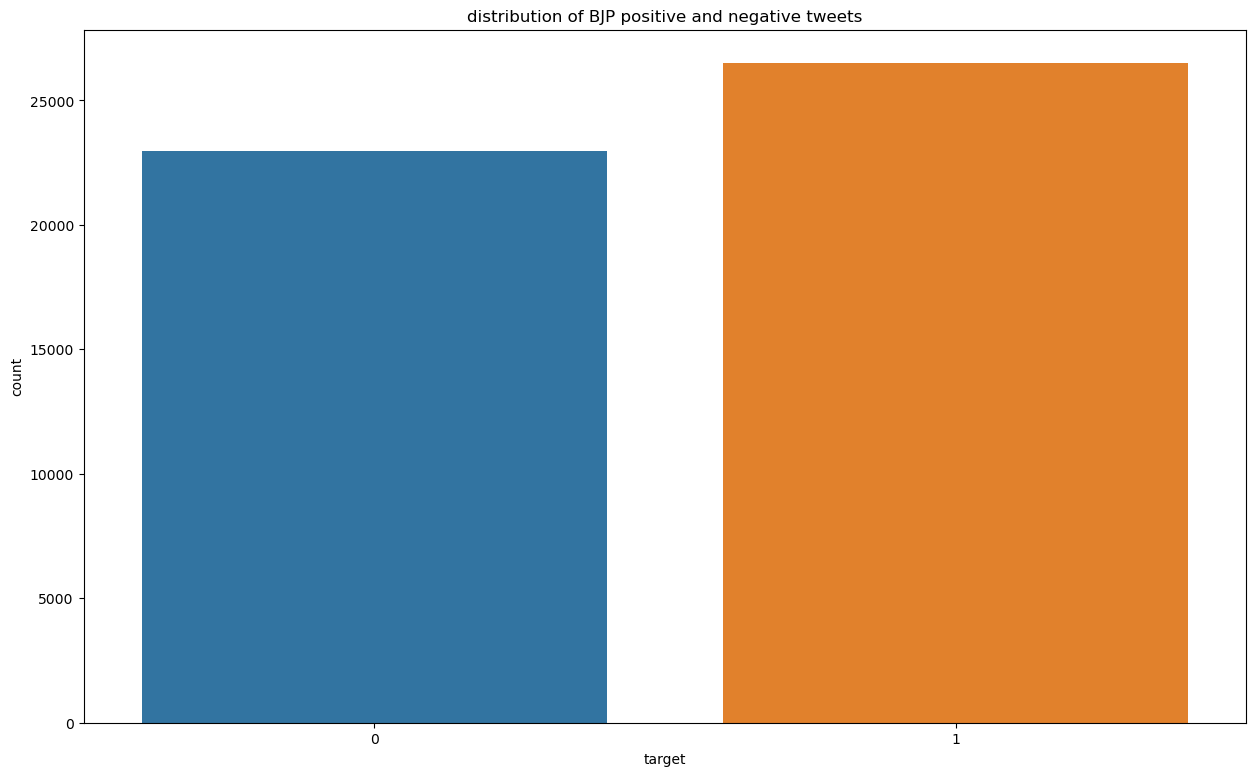

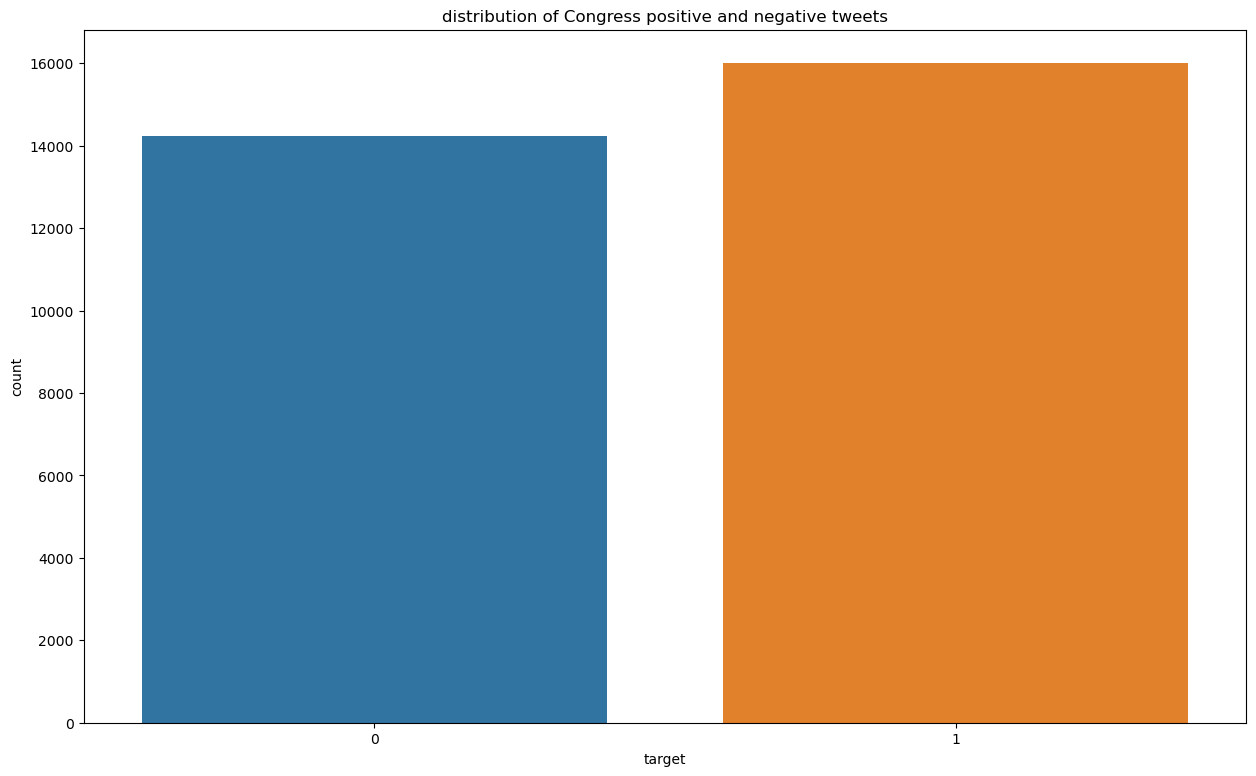

In [26]:
plt.figure(figsize=(15,9))
sns.countplot(data=bjp, x='target')
plt.title('distribution of BJP positive and negative tweets')
plt.show()

plt.figure(figsize=(15,9))
sns.countplot(data=congress, x='target')
plt.title('distribution of Congress positive and negative tweets')
plt.show()

In [27]:
bjp.drop(columns=['Unnamed: 0'],inplace=True,axis=1)

In [28]:
bjp.head()

,target,clean_tweets
0,0,ndtv anchor let go over to aap live press conf...
1,0,sambit patra attacks rahul gandhi over his cow...
2,1,crediting the bjp with taking development to s...
3,0,ktrbrs do do false allegations on iasassociati...
4,1,gujarat assembly yet to get rs cr as gst compe...


In [29]:
congress.drop(columns=['Unnamed: 0'],inplace=True,axis=1)

In [30]:
congress.head()

,target,clean_tweets
0,0,spending shocker cbo latest debt projection sh...
1,1,will you vote for congress in congress co...
2,1,triviapotus we need termlimits for congress
3,0,eam s jaishankar hit out at congress for quad ...
4,1,is this why congress supported amp celebrated ...


In [31]:
import nltk

In [32]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
bjp['num_char']=bjp['clean_tweets'].apply(len)

In [34]:
bjp.head()

,target,clean_tweets,num_char
0,0,ndtv anchor let go over to aap live press conf...,244
1,0,sambit patra attacks rahul gandhi over his cow...,125
2,1,crediting the bjp with taking development to s...,246
3,0,ktrbrs do do false allegations on iasassociati...,263
4,1,gujarat assembly yet to get rs cr as gst compe...,156


In [35]:
congress['num_char']=congress['clean_tweets'].apply(len)

In [36]:
congress.head()

,target,clean_tweets,num_char
0,0,spending shocker cbo latest debt projection sh...,243
1,1,will you vote for congress in congress co...,63
2,1,triviapotus we need termlimits for congress,43
3,0,eam s jaishankar hit out at congress for quad ...,162
4,1,is this why congress supported amp celebrated ...,266


In [37]:
# num of words
bjp['num_words'] = bjp['clean_tweets'].apply(lambda x:len(nltk.word_tokenize(x)))

In [38]:
bjp.head()

,target,clean_tweets,num_char,num_words
0,0,ndtv anchor let go over to aap live press conf...,244,41
1,0,sambit patra attacks rahul gandhi over his cow...,125,17
2,1,crediting the bjp with taking development to s...,246,41
3,0,ktrbrs do do false allegations on iasassociati...,263,47
4,1,gujarat assembly yet to get rs cr as gst compe...,156,21


In [39]:
# num of words
congress['num_words'] = congress['clean_tweets'].apply(lambda x:len(nltk.word_tokenize(x)))

In [40]:
congress.head()

,target,clean_tweets,num_char,num_words
0,0,spending shocker cbo latest debt projection sh...,243,39
1,1,will you vote for congress in congress co...,63,8
2,1,triviapotus we need termlimits for congress,43,6
3,0,eam s jaishankar hit out at congress for quad ...,162,25
4,1,is this why congress supported amp celebrated ...,266,42


In [41]:
bjp['num_sentences'] = bjp['clean_tweets'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [42]:
bjp.head()

,target,clean_tweets,num_char,num_words,num_sentences
0,0,ndtv anchor let go over to aap live press conf...,244,41,1
1,0,sambit patra attacks rahul gandhi over his cow...,125,17,1
2,1,crediting the bjp with taking development to s...,246,41,1
3,0,ktrbrs do do false allegations on iasassociati...,263,47,1
4,1,gujarat assembly yet to get rs cr as gst compe...,156,21,1


In [43]:
congress['num_sentences'] = congress['clean_tweets'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [44]:
congress.head()

,target,clean_tweets,num_char,num_words,num_sentences
0,0,spending shocker cbo latest debt projection sh...,243,39,1
1,1,will you vote for congress in congress co...,63,8,1
2,1,triviapotus we need termlimits for congress,43,6,1
3,0,eam s jaishankar hit out at congress for quad ...,162,25,1
4,1,is this why congress supported amp celebrated ...,266,42,1


In [45]:
bjp[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,49477.000000,49477.000000,49477.0
mean,167.253997,25.493078,1.0
std,80.121641,12.148917,0.0
min,4.000000,1.000000,1.0
25%,108.000000,16.000000,1.0
50%,163.000000,24.000000,1.0
75%,224.000000,34.000000,1.0
max,821.000000,97.000000,1.0


In [46]:
congress[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,30252.000000,30252.000000,30252.0
mean,161.949557,24.369529,1.0
std,74.680367,11.677608,0.0
min,8.000000,1.000000,1.0
25%,105.000000,15.000000,1.0
50%,157.000000,23.000000,1.0
75%,216.000000,32.000000,1.0
max,821.000000,97.000000,1.0


<AxesSubplot:xlabel='num_char', ylabel='Count'>

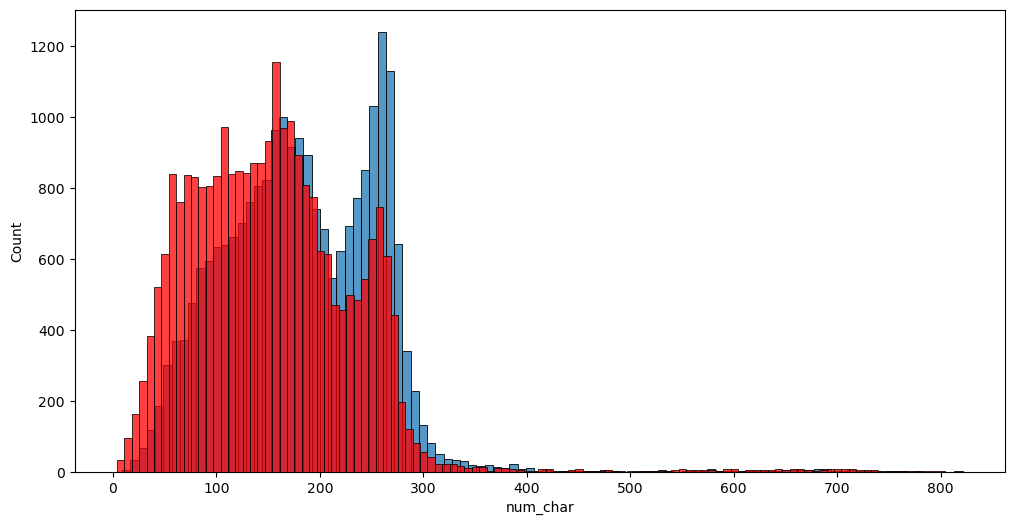

In [47]:
plt.figure(figsize=(12,6))
sns.histplot(bjp[bjp['target'] == 0]['num_char'])
sns.histplot(bjp[bjp['target'] == 1]['num_char'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

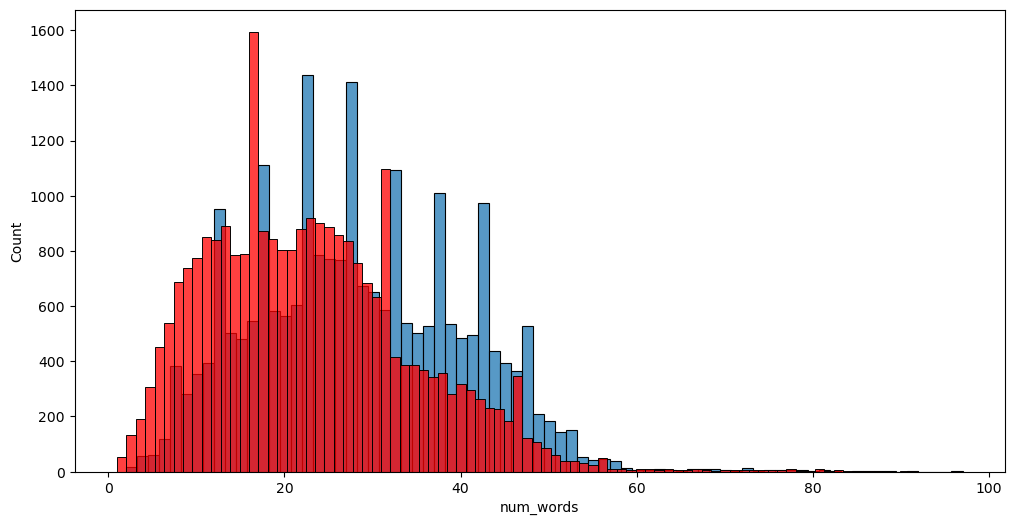

In [48]:
plt.figure(figsize=(12,6))
sns.histplot(bjp[bjp['target'] == 0]['num_words'])
sns.histplot(bjp[bjp['target'] == 1]['num_words'],color='red')

<AxesSubplot:xlabel='num_char', ylabel='Count'>

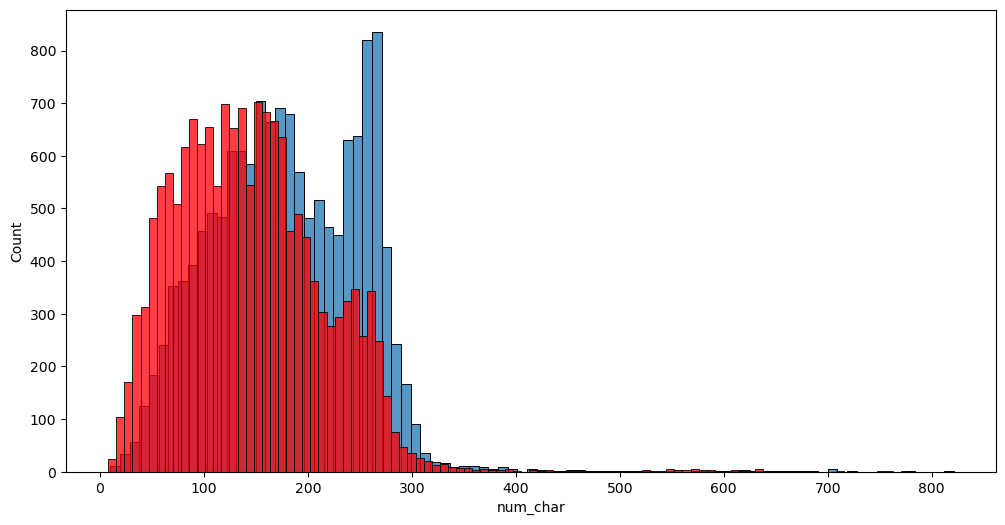

In [49]:
plt.figure(figsize=(12,6))
sns.histplot(congress[congress['target'] == 0]['num_char'])
sns.histplot(congress[congress['target'] == 1]['num_char'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

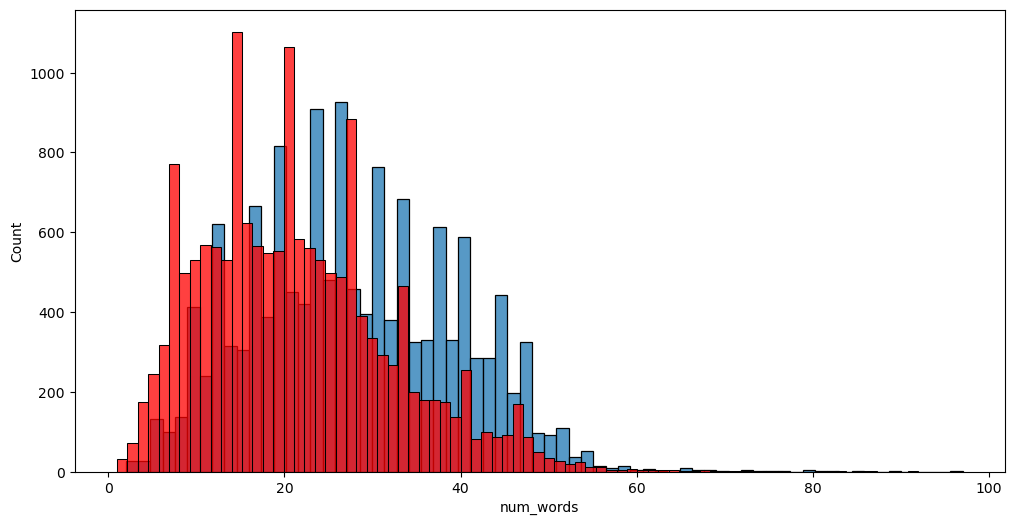

In [50]:
plt.figure(figsize=(12,6))
sns.histplot(congress[congress['target'] == 0]['num_words'])
sns.histplot(congress[congress['target'] == 1]['num_words'],color='red')

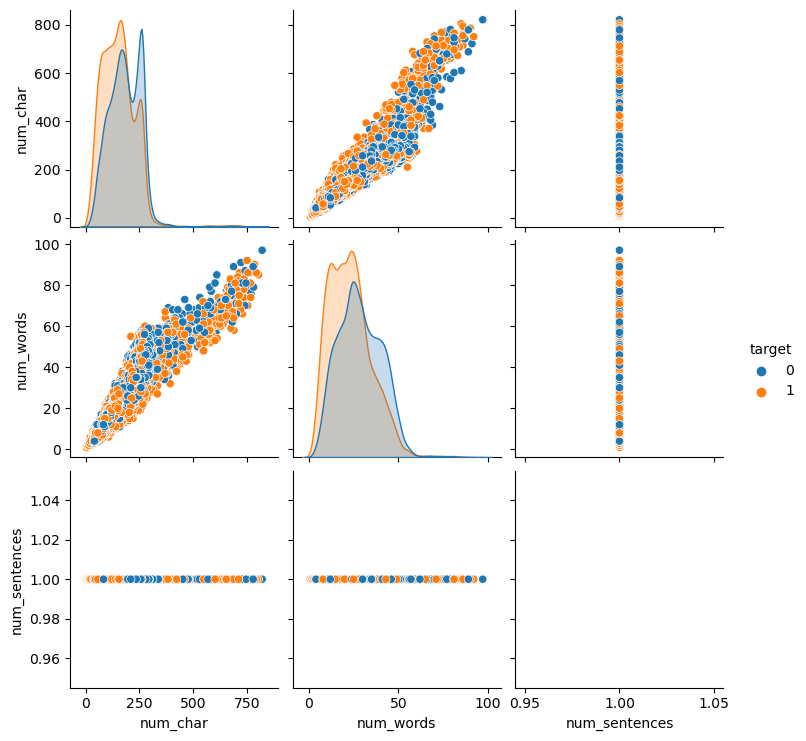

In [51]:
sns.pairplot(bjp,hue='target')

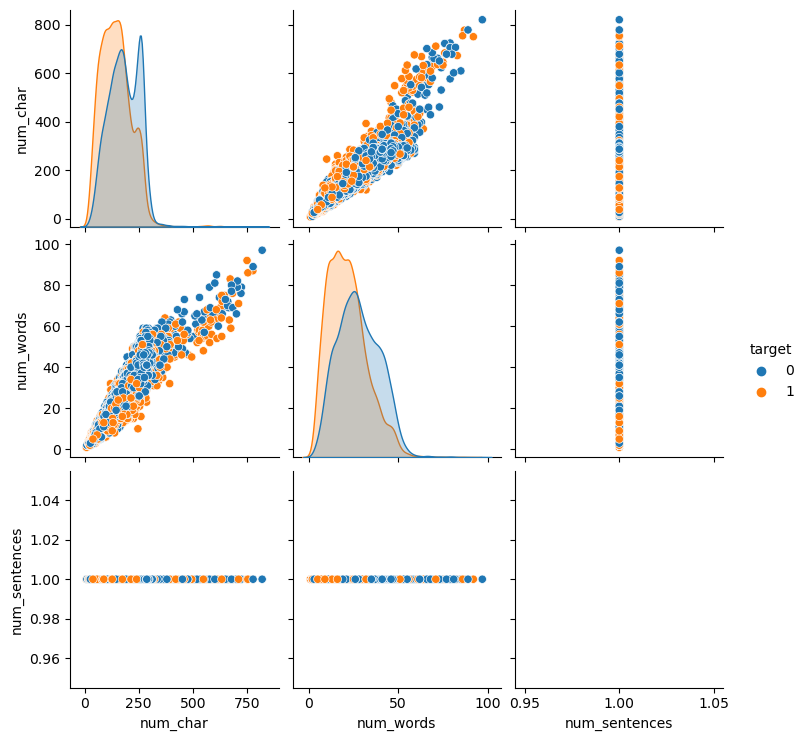

In [52]:
sns.pairplot(congress,hue='target')

<AxesSubplot:>

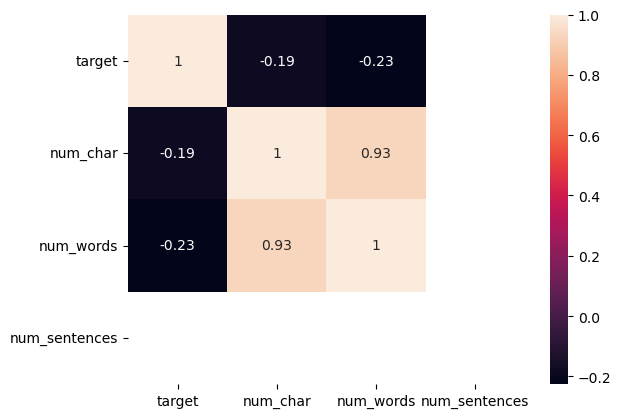

In [53]:
sns.heatmap(bjp.corr(),annot=True)

<AxesSubplot:>

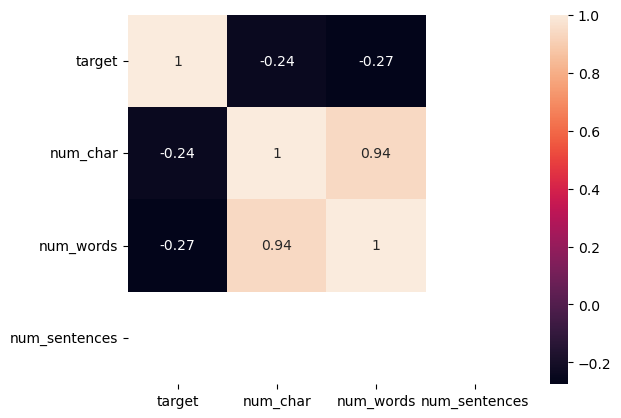

In [54]:
sns.heatmap(congress.corr(),annot=True)

Data preprocessing

.Lower case .Tokenization .Removing special characeters .Removing stop words and punctuation .stemming

In [55]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [56]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [57]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [58]:
def transform_text(clean_tweets):
    clean_tweets = clean_tweets.lower()
    clean_tweets = nltk.word_tokenize(clean_tweets)
    
    y = []
    for i in clean_tweets:
        if i.isalnum():
            y.append(i)
    
    clean_tweets = y[:]
    y.clear()
    
    for i in clean_tweets:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    clean_tweets = y[:]
    y.clear()
    
    for i in clean_tweets:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [59]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore t")

'gon na home soon want talk stuff anymor'

In [60]:
bjp['transformed_tweets'] = bjp['clean_tweets'].apply(transform_text)

In [61]:
bjp.head()

,target,clean_tweets,num_char,num_words,num_sentences,transformed_tweets
0,0,ndtv anchor let go over to aap live press conf...,244,41,1,ndtv anchor let go aap live press confer next ...
1,0,sambit patra attacks rahul gandhi over his cow...,125,17,1,sambit patra attack rahul gandhi cowardic rema...
2,1,crediting the bjp with taking development to s...,246,41,1,credit bjp take develop smaller citi town pmmo...
3,0,ktrbrs do do false allegations on iasassociati...,263,47,1,ktrbr fals alleg iasassoci use smart ass kapil...
4,1,gujarat assembly yet to get rs cr as gst compe...,156,21,1,gujarat assembl yet get rs cr gst compens say ...


In [62]:
congress['transformed_tweets'] = congress['clean_tweets'].apply(transform_text)

In [63]:
congress.head()

,target,clean_tweets,num_char,num_words,num_sentences,transformed_tweets
0,0,spending shocker cbo latest debt projection sh...,243,39,1,spend shocker cbo latest debt project stun eve...
1,1,will you vote for congress in congress co...,63,8,1,vote congress congress congresssankalp
2,1,triviapotus we need termlimits for congress,43,6,1,triviapotu need termlimit congress
3,0,eam s jaishankar hit out at congress for quad ...,162,25,1,eam jaishankar hit congress quad reluct rahul ...
4,1,is this why congress supported amp celebrated ...,266,42,1,congress support amp celebr arrest manishsisod...


In [64]:
neg_corpus = []
for msg in bjp[bjp['target'] == 1]['transformed_tweets'].tolist():
    for word in msg.split():
        neg_corpus.append(word)
        

In [65]:
len(neg_corpus)

484045

In [66]:
pos_corpus = []
for msg in bjp[bjp['target'] == 0]['transformed_tweets'].tolist():
    for word in msg.split():
        pos_corpus.append(word)

In [67]:
len(pos_corpus)

472882

Model Building

In [68]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=25000)

In [69]:
X = tfidf.fit_transform(bjp['transformed_tweets']).toarray()

In [70]:
X_c = tfidf.fit_transform(congress['transformed_tweets']).toarray()

In [71]:
X_c.shape

(30252, 25000)

In [72]:
y_c = congress['target'].values

In [73]:
X.shape

(49477, 25000)

In [74]:
y = bjp['target'].values

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [77]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [78]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [79]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.5537590945836701
[[3768  854]
 [3562 1712]]
0.6671862821512081


In [80]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.7358528698464026
[[3317 1305]
 [1309 3965]]
0.7523719165085389


In [81]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.7356507679870655
[[3359 1263]
 [1353 3921]]
0.7563657407407407


In [82]:
bjp.head()

,target,clean_tweets,num_char,num_words,num_sentences,transformed_tweets
0,0,ndtv anchor let go over to aap live press conf...,244,41,1,ndtv anchor let go aap live press confer next ...
1,0,sambit patra attacks rahul gandhi over his cow...,125,17,1,sambit patra attack rahul gandhi cowardic rema...
2,1,crediting the bjp with taking development to s...,246,41,1,credit bjp take develop smaller citi town pmmo...
3,0,ktrbrs do do false allegations on iasassociati...,263,47,1,ktrbr fals alleg iasassoci use smart ass kapil...
4,1,gujarat assembly yet to get rs cr as gst compe...,156,21,1,gujarat assembl yet get rs cr gst compens say ...


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [85]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
    
}

In [86]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision